# Import

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import time
from qutip import *
import os

from conveniant_functions import *


In [2]:
test_arr = [1,2,3,['ddd','sss']]

save_arr(test_arr, 'dadum')

data/2020-08-21_14-51-31_dadum


In [5]:
file_calibration = np.load('data/2020-08-21_10-00-29_dadum.npz',allow_pickle=True)
test = file_calibration['arr_0']

test

array([1, 2, 3, list(['ddd', 'sss'])], dtype=object)

# Multiprocessing and joblib

In [6]:
def func(x):
    return(x**x)

In [7]:
import multiprocessing as mp

t1 = time.time()
if __name__ == "__main__":
    pool = mp.Pool(8)
    res = pool.map(func, range(1000))

time.sleep(0.1)
print(res[1:10])
print("processing time:", np.round( time.time()-t1, 4))

[1, 4, 27, 256, 3125, 46656, 823543, 16777216, 387420489]
processing time: 0.125


In [8]:
from joblib import Parallel, delayed

t1 = time.time()
res = Parallel(n_jobs=-1)(delayed(func)(2) for i in range(1000))
print(res[1:10])
print("processing time:", np.round( time.time()-t1, 4))

[4, 4, 4, 4, 4, 4, 4, 4, 4]
processing time: 0.237


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from joblib import Parallel, delayed

def func_plot(a):
    x = np.linspace(0,1,10)
    y = a*x**2
    plt.plot(x, y)
    plt.show()
    return x, y

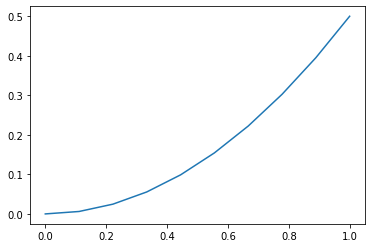

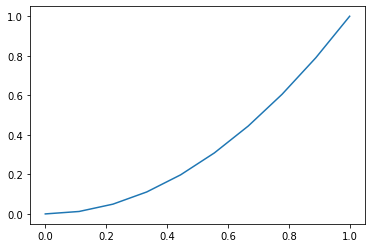

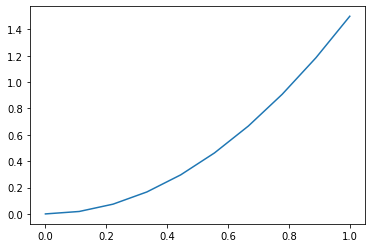

[(array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ]), array([0.        , 0.00617284, 0.02469136, 0.05555556, 0.09876543,
       0.15432099, 0.22222222, 0.30246914, 0.39506173, 0.5       ])), (array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ]), array([0.        , 0.01234568, 0.04938272, 0.11111111, 0.19753086,
       0.30864198, 0.44444444, 0.60493827, 0.79012346, 1.        ])), (array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ]), array([0.        , 0.01851852, 0.07407407, 0.16666667, 0.2962963 ,
       0.46296296, 0.66666667, 0.90740741, 1.18518519, 1.5       ]))]
[(array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ]), array([0.        , 0.00617284, 0.024691

In [10]:
a_list = [0.5,1,1.5]

res = [func_plot(a) for a in a_list]
print(res)

res = Parallel(n_jobs=-1)(delayed(func_plot)(a) for a in a_list)
print(res)

# try adaptive

In [16]:
import adaptive
adaptive.notebook_extension()

In [22]:
runner.live_info()
runner.live_plot(update_interval=0.02)

Button(description='cancel live-plot', layout=Layout(width='150px'), style=ButtonStyle())

:DynamicMap   []
   :Overlay
      .Scatter.I :Scatter   [x]   (y)

In [23]:
learner2 = adaptive.Learner1D(f, bounds=learner.bounds)

xs = np.linspace(*learner.bounds, len(learner.data))
learner2.tell_many(xs, map(partial(f, wait=False), xs))

learner.plot() + learner2.plot()

NameError: name 'partial' is not defined

In [25]:
def f(x):
    return np.sin(1/x)

learner = adaptive.Learner1D(f, bounds=(0.0001, 2))
runner = adaptive.Runner(learner, goal=lambda l: l.loss() < 0.05)
runner.live_info()
runner.live_plot(update_interval=0.02)

Button(description='cancel live-plot', layout=Layout(width='150px'), style=ButtonStyle())

:DynamicMap   []
   :Overlay
      .Scatter.I :Scatter   [x]   (y)

## 2D

In [26]:
def ring(xy, wait=True):
    import numpy as np
    from time import sleep
    from random import random
    if wait:
        sleep(random()/10)
    x, y = xy
    a = 0.2
    return y + np.exp(-(x**2 + y**2 - 0.75**2)**2/a**4)

learner = adaptive.Learner2D(ring, bounds=[(-1, 1), (-1, 1)])

In [27]:
runner = adaptive.Runner(learner, goal=lambda l: l.loss() < 0.01)

runner.live_info()

def plot(learner):
    plot = learner.plot(tri_alpha=0.2)
    return (plot.Image + plot.EdgePaths.I + plot).cols(3)

runner.live_plot(plotter=plot, update_interval=0.1)

Button(description='cancel live-plot', layout=Layout(width='150px'), style=ButtonStyle())

:DynamicMap   []
   :Layout
      .Overlay.I   :Overlay
         .I :Image   [x,y]   (z)
      .EdgePaths.I :EdgePaths   [x,y]
      .Overlay.II  :Overlay
         .Image.I     :Image   [x,y]   (z)
         .EdgePaths.I :EdgePaths   [x,y]

In [28]:
help(learner)

Help on Learner2D in module adaptive.learner.learner2D object:

class Learner2D(adaptive.learner.base_learner.BaseLearner)
 |  Learns and predicts a function 'f: ℝ^2 → ℝ^N'.
 |  
 |  Parameters
 |  ----------
 |  function : callable
 |      The function to learn. Must take a tuple of two real
 |      parameters and return a real number.
 |  bounds : list of 2-tuples
 |      A list ``[(a1, b1), (a2, b2)]`` containing bounds,
 |      one per dimension.
 |  loss_per_triangle : callable, optional
 |      A function that returns the loss for every triangle.
 |      If not provided, then a default is used, which uses
 |      the deviation from a linear estimate, as well as
 |      triangle area, to determine the loss. See the notes
 |      for more details.
 |  
 |  Attributes
 |  ----------
 |  data : dict
 |      Sampled points and values.
 |  pending_points : set
 |      Points that still have to be evaluated and are currently
 |      interpolated, see `data_combined`.
 |  stack_size : in

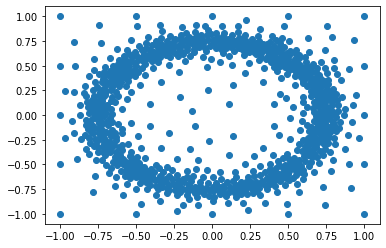

In [29]:
sPs = np.array(list(learner.data.keys()))
sVs = np.array(list(learner.data.values()))
n_samp = len(sPs)

plt.scatter([sPs[i][0] for i in range(n_samp)], [sPs[i][1] for i in range(n_samp)])
plt.show()

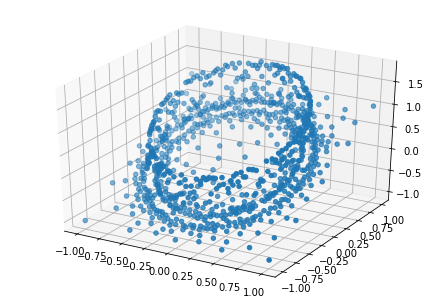

In [30]:
from mpl_toolkits.mplot3d import Axes3D
# %matplotlib widget

fig = plt.figure()
ax = Axes3D(fig)

ax.scatter([sPs[i][0] for i in range(n_samp)], [sPs[i][1] for i in range(n_samp)], sVs)
plt.show()

In [31]:
def tableau(xy):
    x, y = xy
    if x**2 + 0.66*y**2 < 1:
        if x**2 + 0.66*y**3 < 0.4:
            return 0.5, 1
        else:
            return 1, 0.5
    else:
        return 0, 0

In [32]:
learner = adaptive.Learner2D(tableau, bounds=[(-2, 2), (-2, 2)])

runner = adaptive.Runner(learner, goal=lambda l: l.loss() < 0.01)

runner.live_info()

def plot(learner):
    plot = learner.plot(tri_alpha=0.2)
    return (plot.Image + plot.EdgePaths.I + plot).cols(3)

runner.live_plot(plotter=plot, update_interval=0.1)

Button(description='cancel live-plot', layout=Layout(width='150px'), style=ButtonStyle())

:DynamicMap   []
   :Layout
      .Overlay.I   :Overlay
         .I :Image   [x,y]   (z)
      .EdgePaths.I :EdgePaths   [x,y]
      .Overlay.II  :Overlay
         .Image.I     :Image   [x,y]   (z)
         .EdgePaths.I :EdgePaths   [x,y]

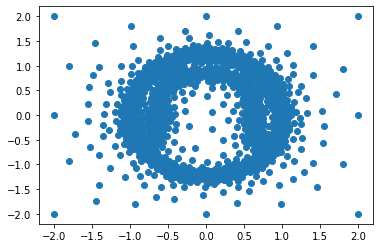

In [33]:
sPs = np.array(list(learner.data.keys()))
sVs = np.array(list(learner.data.values()))
n_samp = len(sPs)

plt.scatter([sPs[i][0] for i in range(n_samp)], [sPs[i][1] for i in range(n_samp)])
plt.show()

In [34]:
sVs

array([[0.5, 1. ],
       [0. , 0. ],
       [0. , 0. ],
       ...,
       [0. , 0. ],
       [1. , 0.5],
       [0.5, 1. ]])

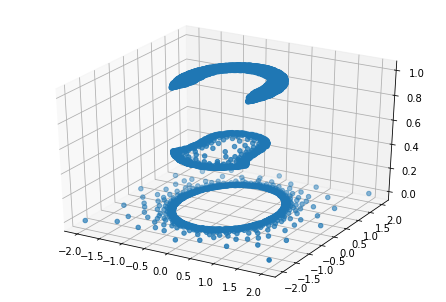

In [35]:
fig = plt.figure()
ax = Axes3D(fig)

ax.scatter([sPs[i][0] for i in range(n_samp)], [sPs[i][1] for i in range(n_samp)], [sVs[i][0] for i in range(n_samp)])
plt.show()

# saving arrays and get ion properties from file

In [36]:
from time import localtime, strftime
time_str = strftime("%Y-%m-%d_%H-%M-%S", localtime())
time_str

note = ''
if note == '':
    print(time_str)
else:
    print(time_str + '_' + note)

2020-08-21_15-01-23


In [37]:
direct = '/mnt/paula/Results/tiamo4.sync/2020/08_August/14/OC_Axial/z_coherent_displ_car_blue/'
fnames = os.listdir(direct)
files = sorted([direct+f for f in fnames])
files = select_files(files, [14,19,00], [15,2,00])
files

17 files


['/mnt/paula/Results/tiamo4.sync/2020/08_August/14/OC_Axial/z_coherent_displ_car_blue/14_19_36_14_08_2020.dat',
 '/mnt/paula/Results/tiamo4.sync/2020/08_August/14/OC_Axial/z_coherent_displ_car_blue/14_22_12_14_08_2020.dat',
 '/mnt/paula/Results/tiamo4.sync/2020/08_August/14/OC_Axial/z_coherent_displ_car_blue/14_24_49_14_08_2020.dat',
 '/mnt/paula/Results/tiamo4.sync/2020/08_August/14/OC_Axial/z_coherent_displ_car_blue/14_27_25_14_08_2020.dat',
 '/mnt/paula/Results/tiamo4.sync/2020/08_August/14/OC_Axial/z_coherent_displ_car_blue/14_30_03_14_08_2020.dat',
 '/mnt/paula/Results/tiamo4.sync/2020/08_August/14/OC_Axial/z_coherent_displ_car_blue/14_32_39_14_08_2020.dat',
 '/mnt/paula/Results/tiamo4.sync/2020/08_August/14/OC_Axial/z_coherent_displ_car_blue/14_35_15_14_08_2020.dat',
 '/mnt/paula/Results/tiamo4.sync/2020/08_August/14/OC_Axial/z_coherent_displ_car_blue/14_37_52_14_08_2020.dat',
 '/mnt/paula/Results/tiamo4.sync/2020/08_August/14/OC_Axial/z_coherent_displ_car_blue/14_40_28_14_08_202

In [38]:
from PyModules.analyse_eios.eios_data import read, read_xml

data, xml = read(files[0])

In [39]:
xml_dict = read_xml(xml)
xml_dict['ionproperties']

{'A_init_spin_up': 0.0,
 'A_laserkick': 0.0,
 'A_sbc': 1.0,
 'A_squeeze': 0.0,
 'B1_dummy': 105.0,
 'B3_dummy': 120.0,
 'CC_BC0_dummy': 1.55,
 'CC_BC4_dummy': 2.3,
 'Damp2': -0.025,
 'ERO': 25.0,
 'ERa': 24.0,
 'ERaO': 3.0,
 'ERaO_fine': 4.0,
 'ERaU': 1.0,
 'ERaU_fine': 2.0,
 'ERiO': 11.0,
 'ERiO_fine': 12.0,
 'ERiU': 9.0,
 'ERiU_fine': 10.0,
 'EU_416': 29.0,
 'EU_558': 31.0,
 'EU_685': 30.0,
 'EU_RF_pulses': 1.0,
 'EU_beam_conf': 0.0,
 'EU_beam_fr': 1774.83,
 'EU_cool': 20.0,
 'EU_cool_old': 36.0,
 'EU_init': 18.0,
 'EU_kick': 26.0,
 'EU_kick2': 27.0,
 'EU_low_RF': 35.0,
 'EU_open_LP': 1.0,
 'EU_profile_cool': 20.0,
 'EU_profile_init': 18.0,
 'EU_profile_target': 19.0,
 'EU_ramp_init': 1.0,
 'EU_ramp_target': 1.0,
 'EU_squeeze': 34.0,
 'EU_switch_RF': 0.0,
 'EU_t_RCKm_1R': 25.0,
 'EU_t_hf_1R': 40.0,
 'EU_t_lf_1R': 5.0,
 'EU_t_mf_1R': 110.0,
 'EU_t_mf_2R': 0.0,
 'EU_t_oc': 4.07,
 'EU_t_roc': 50.0,
 'EU_target': 19.0,
 'EU_var': 28.0,
 'EU_weakRF': 32.0,
 'EU_weakRF2': 33.0,
 'EZO': 7.0

# get wigner function for qutip state

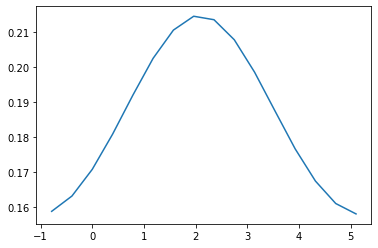

0.22187651939366826

In [40]:
n_alpha = 0.1708
alpha = np.sqrt(0.1708)
x = np.linspace(0,2*np.pi,17)
x_new = np.append(x[-3:]-2*np.pi,x[:-3])

D = displace(12, alpha*np.exp(2.0825j))
psi = D * thermal_dm(12,0.15) * D.dag()
z_sim = n_alpha*np.exp(x_new*1j)
x_sim = np.real(z_sim)
y_sim = np.imag(z_sim)

sim_dat_y = np.diag(wigner(psi, x_sim, y_sim))

plt.plot(x_new, sim_dat_y)
plt.show()
np.max(wigner(psi, x_sim, y_sim))

In [41]:
def W_from_fock_simple(focks):
    w = 0
    for i, f in enumerate(focks):
        w += (-1)**i * f
        return 2/np.pi * w

In [42]:
phi = 0
phis = np.linspace(0, 2*np.pi, 25)

w_list = []
for phi in phis:
    phi_disp = displace(12, alpha*np.exp(phi*1j)).dag() * psi * displace(12, alpha*np.exp(phi*1j))
    focks = np.abs(np.diag(phi_disp.full()))

    w_list.append(W_from_fock_simple(focks))

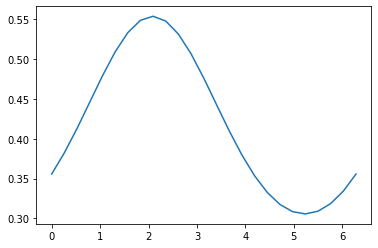

In [43]:
plt.plot(phis, w_list)
plt.show()

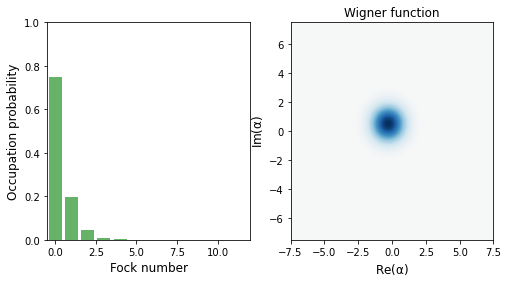

In [44]:
plot_wigner_fock_distribution(psi)
plt.show()

In [45]:
np.diag(wigner(psi, x_sim, y_sim))

array([0.15879089, 0.16315966, 0.1707583 , 0.1707583 , 0.18076862,
       0.19189771, 0.20242864, 0.21047338, 0.21442172, 0.21343121,
       0.20771637, 0.19847313, 0.1874824 , 0.17660937, 0.16742164,
       0.16102242, 0.15805736])

In [46]:
def wig(phi, alpha):
    psi = squeeze(12, 0.8) * thermal_dm(12, 0.1) * squeeze(12, 0.8).dag()
    phi_disp = displace(12, alpha*np.exp(phi*1j)).dag() * psi * displace(12, alpha*np.exp(phi*1j))
    focks_sim = np.abs(np.diag(phi_disp.full()))
    return W_from_fock_simple(focks_sim)

wig(5,0)

0.43350969931895256

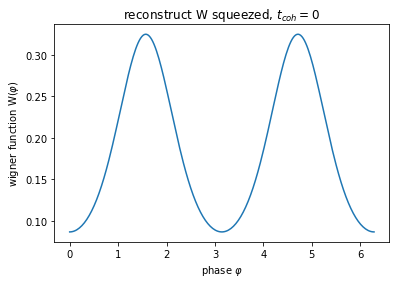

In [47]:
x = np.linspace(0,2*np.pi,250)
w_theory = [wig(xx, 1) for xx in x]


plt.plot(x,w_theory, label='theory')
plt.title(r'reconstruct W squeezed, $t_{coh} = 0$')
plt.xlabel(r'phase $\varphi$')
plt.ylabel(r'wigner function W($\varphi$)')

plt.show()